In [1]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

import mlflow
import mlflow.tensorflow

Text(0.5, 1.0, '7')

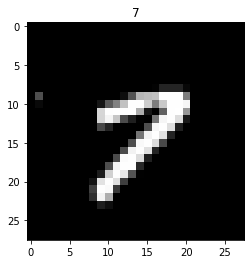

In [3]:
(X_treinamento, y_treinamento),(X_teste, y_teste) = mnist.load_data()
plt.imshow(X_treinamento[29], cmap='gray')
plt.title(y_treinamento[29])

In [4]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [5]:
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
#Normalização das variaveis
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

X_treinamento /=255
X_teste /=255

In [7]:
#aplicação do dummy
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [8]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [16]:
def deep_learning(camadas_ocultas, n_unites, funcao_ativacao, drop_out, epocas):
    mlflow.set_experiment('dp_deep_learning')
    
    with mlflow.start_run():
        mlflow.tensorflow.autolog()
        
        #registro de tags
        mlflow.set_tag('camadas_ocultas', camadas_ocultas)
        mlflow.set_tag('n_unites', n_unites)
        mlflow.set_tag('funcao_ativacao', funcao_ativacao)
        mlflow.set_tag('drop_out', drop_out)
        mlflow.set_tag('epocas', epocas)
        
        modelo = Sequential()
        
               
        #camadas de entradas e camadas ocultas
        modelo.add(Dense(units=n_unites, activation=funcao_ativacao, input_dim=784))
        modelo.add(Dropout(drop_out))
        
        #proxima camada oculta
        for i in range(camadas_ocultas):
            modelo.add(Dense(units=n_unites, activation=funcao_ativacao))
            modelo.add(Dropout(drop_out))
            
        #saída
        modelo.add(Dense(units=10, activation='softmax'))
        
        
        modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        modelo.summary()
        
        historia = modelo.fit(X_treinamento, y_treinamento, epochs=epocas, validation_data=(X_teste, y_teste))
        
        #gerando gráficos
        historia.history.keys()
        loss = plt.plot(historia.history['val_loss'])
        plt.savefig('loss.png')
        acuracia = plt.plot(historia.history['val_accuracy'])
        plt.savefig('acuracia.png')

        #acessar gráficos
        mlflow.log_artifact('loss.png')
        mlflow.log_artifact('acuracia.png')
        
                
        #informações da execução
        print('Modelo: ', mlflow.active_run().info.run_uuid)
    mlflow.end_run()  

In [ ]:
camadas_ocultas = [1, 2, 3]
n_unites = [16, 32, 64]
funcao_ativacao = ['relu', 'sigmoid']
drop_out = [0.1, 0.2]
epocas = [5, 10, 20]

for layer in camadas_ocultas:
  for unidades in n_unites:
    for funcao in funcao_ativacao:
      for der in drop_out:
        for epocs in epocas:


            deep_learning(layer, unidades, funcao, der, epocs) 

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                50240     
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 10)              

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4559 - accuracy: 0.8589 - val_loss: 0.1780 - val_accuracy: 0.9462
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2356 - accuracy: 0.9307 - val_loss: 0.1386 - val_accuracy: 0.9560
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1955 - accuracy: 0.9439 - val_loss: 0.1105 - val_accuracy: 0.9672
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1717 - accuracy: 0.9499 - val_loss: 0.1128 - val_accuracy: 0.9655
Epoch 5/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1503 - accuracy: 0.9552 - val_loss: 0.1015 - val_accuracy: 0.9681
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1405 - accuracy: 0.9577 - val_loss: 0.0961 - val_accuracy: 0.9712
Epoch 7/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1315 - accuracy: 0.9608 - val_loss: 0.0950 - val_accuracy: 0.9711
Epo

2023/03/08 20:09:17 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.4+cuda11.cudnn82) contains a local version label (+cuda11.cudnn82). MLflow logged a pip requirement for this package as 'jaxlib==0.4.4' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Modelo:  87fe823eabb741669777328faea7bcb6


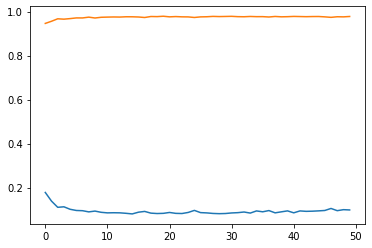

In [17]:
deep_learning(2, 64, 'relu', 0.2, 50)